# K Nearest Neighbor
<a id="0"></a>

<ol>
    <li>Supervised learning algorithm used for both <strong> regression </strong> and <strong> classification </strong> </li>
    <li>An approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.</li>
    <li>Use value of <strong> k </strong> indicates the number of training samples that are needed to classify the test sample.</li>
    <li> Use Euclidean distance to identify distance of two point:  <strong>d = √ [ (x 2 – x 1) 2 + (y 2 – y 1) 2 ]</strong>
</ol>

- [import dataset](#1)
- [first glance of data](#2)
- [Data Scatter plot (full set data)](#3)
- [Train and test dataset seperation](#4)
- [Create KNN class](#5)
- [KNN Classifier from Sklearn library](#6)

In [213]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

<a id="1"></a>
### Import Iris flower dataset
[return to top](#0)

In [10]:
dataset_path = '/Users/Asus/Desktop/Unity Game/python/Data_Analysis/Machine_Learning_Python'
df = pd.read_csv(os.path.join(dataset_path, 'Iris.csv'))

<a id="2"></a>
### First glance of data
[return to top](#0)

In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<a id="3"></a>
### Data Scatter plot (full set data)
[return to top](#0)

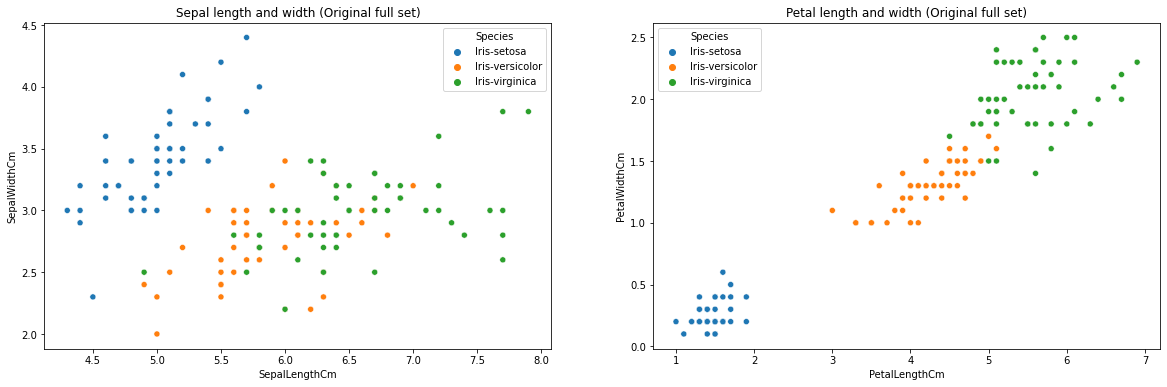

In [267]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', ax=ax[0])
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', ax=ax[1])
ax[0].set_title('Sepal length and width (Original full set)')
ax[1].set_title('Petal length and width (Original full set)')
plt.show()

<a id="4"></a>
## Train and test dataset seperation
[return to top](#0)

In [249]:
y, Species = pd.factorize(df.Species)
X = df.set_index('Id').drop('Species', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'Shape of X_train: {X_train.shape}\nShape of X_valid: {X_valid.shape}\nShape of y_train: {y_train.shape}\nShape of y_valid: {y_valid.shape}')

Shape of X_train: (120, 4)
Shape of X_valid: (30, 4)
Shape of y_train: (120,)
Shape of y_valid: (30,)


### - Training data scatter plot

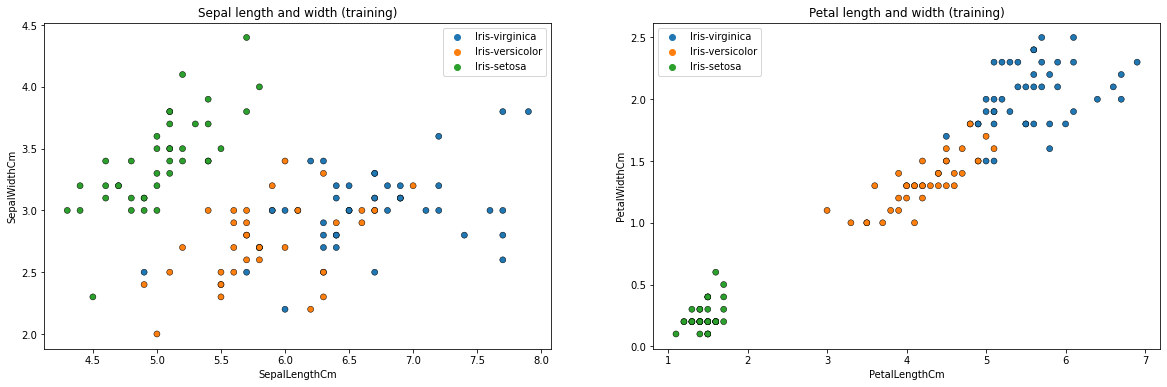

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.scatterplot(x=X_train.SepalLengthCm, y=X_train.SepalWidthCm, hue=Species[y_train], edgecolor='k', ax=ax[0])
sns.scatterplot(x=X_train.PetalLengthCm, y=X_train.PetalWidthCm, hue=Species[y_train], edgecolor='k', ax=ax[1])
ax[0].set_title('Sepal length and width (training)')
ax[1].set_title('Petal length and width (training)')
plt.show()

<a id="5"></a>
### Create KNN class
- develop KNN model

[return to top](#0)

In [192]:
def Euclidean(x1, x2):
    # d = √ [ (x 2 – x 1) 2 + (y 2 – y 1) 2 ]
    return np.sqrt(np.sum((x1-x2)**2))

In [275]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self, x):
        # compute distance (euclidean)
        distance = [Euclidean(x, x_train) for x_train in self.X_train]
        # get k nearest samples, labels
        k_indices = np.argsort(distance)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [277]:
model = KNN(k=6)
# need to convert dataframe to numpy array
model.fit(X_train.to_numpy(), y_train)
pred = model.predict(X_valid.to_numpy())

acc = np.sum(pred == y_valid) / len(y_valid)
print(f'KNN model accuracy: {acc*100:.2f}%')
print('All testing data classify correctly')

KNN model accuracy: 100.00%
All testing data classify correctly


### - Testing data scatter plot

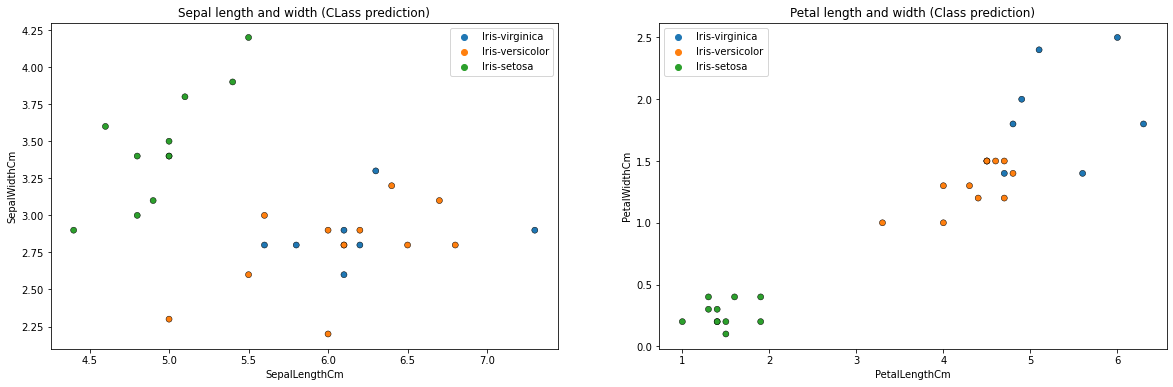

In [265]:
cat = Species[pred]

fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.scatterplot(x=X_valid.SepalLengthCm, y=X_valid.SepalWidthCm, hue=cat, edgecolor='k', ax=ax[0])
sns.scatterplot(x=X_valid.PetalLengthCm, y=X_valid.PetalWidthCm, hue=cat, edgecolor='k', ax=ax[1])
ax[0].set_title('Sepal length and width (CLass prediction)')
ax[1].set_title('Petal length and width (Class prediction)')
plt.show()

<a id="6"></a>
### KNN Classifier from Sklearn library
- develop KNN classifier model from sklearn 

[return to top](#0)

In [271]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
prediction = knn_model.predict(X_valid)

accuracy = np.sum(prediction == y_valid) / len(y_valid)

print(f'KNN model accuracy: {accuracy*100:.2f}%')
print('All testing data classify correctly')

KNN model accuracy: 100.00%
All testing data classify correctly


### - Testing data scatter plot

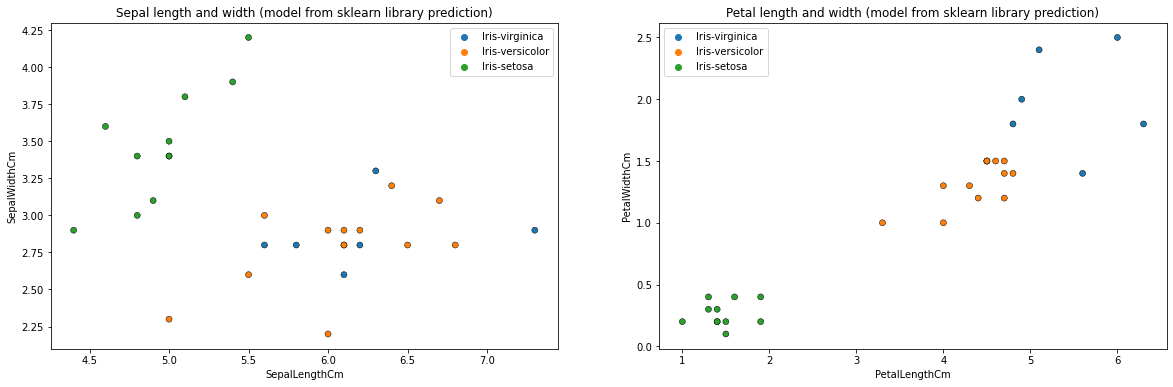

In [266]:
category = Species[prediction]

fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.scatterplot(x=X_valid.SepalLengthCm, y=X_valid.SepalWidthCm, hue=category, edgecolor='k', ax=ax[0])
sns.scatterplot(x=X_valid.PetalLengthCm, y=X_valid.PetalWidthCm, hue=category, edgecolor='k', ax=ax[1])
ax[0].set_title('Sepal length and width (model from sklearn library prediction)')
ax[1].set_title('Petal length and width (model from sklearn library prediction)')
plt.show() 